### KNN and Naive Bayes

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score)

### Read the data

In [2]:
df=pd.read_csv(r"C:\Users\hp\Desktop\Siiiiuuuu\MLRutwik Sir\Diabetes.csv")
print(df)

     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33   

In [4]:
#Data has 768 rows and 8 columns 


#Glucose levels, measured in milligrams per deciliter (mg/dL), indicate the concentration of glucose (sugar) in the blood. 
#Elevated glucose levels can suggest a risk of diabetes mellitus or prediabetes.


#High blood pressure increases the risk of developing type 2 diabetes and worsens complications for those already diagnosed with diabetes.


#Skin thickness column represents the thickness of the skinfold (mm) on the triceps area. 
#Skinfold thickness measurements are often used as an indicator of body fat percentage. 
#Higher skinfold thickness values may indicate higher levels of body fat, which can be associated with obesity and metabolic disorders
#This all leads to a risk of Diabetes


#Insulin is critical for regulating blood sugar levels, and its deficiency or ineffectiveness is central to the development 
#and management of diabetes. 


#Higher Body Mass Index (BMI) is strongly associated with an increased risk of developing type 2 diabetes. 
#Excess body weight, especially abdominal fat, leads to insulin resistance, a key factor in diabetes development. 
#Individuals with high BMI are more likely to have prediabetes, and obesity complicates diabetes management, increasing the risk of related health issues.


#DiabetesPedigreeFunction provides valuable information about the genetic risk of diabetes based on family history. 
#It serves as a tool for assessing the likelihood of developing diabetes and can guide healthcare providers in implementing 
#preventive strategies and interventions to mitigate the risk of the disease.


#Age is a significant risk factor for diabetes, with increasing age associated with a higher prevalence and risk of complications.


#Outcome column represents that the individual has diabetes or not i.e it is the target/dependent variable

### To check the null values

In [3]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Information of the data 

In [4]:
#we can see that data has no missing or null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


### Descriptive statistics 

In [5]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Minimum values for many variables are 0. This is not possible. Hence, we can consider these values as missing values.

### Seperate the independent and target variable

In [6]:
x=df.drop("Outcome",axis=1)
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [ ]:
#we have outcome as the target/dependent variable and rest 7 colums are the regressors/independent variables.
#also our target variable is in binary and integer form

In [7]:
y=df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Plot

<Axes: ylabel='BMI'>

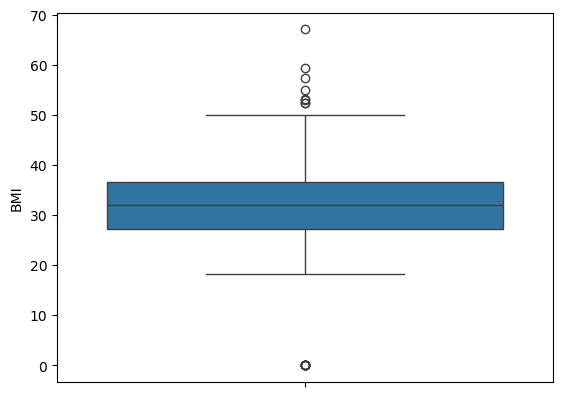

In [8]:
sns.boxplot(df["BMI"])

In [11]:
#WE can see that people with BMI between 28 and 38 approx have higher chances of diabetes 
#Also in our data outliers are present 

### To check the outliers and treat them for better accuracy

In [9]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

In [10]:
mask=((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR)))
df[mask]=np.nan

<Axes: ylabel='BMI'>

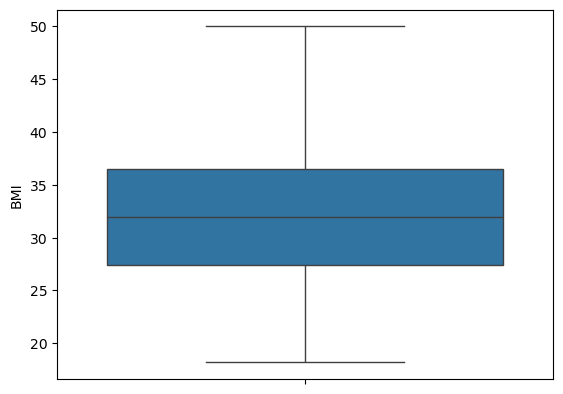

In [11]:
sns.boxplot(df["BMI"])

In [ ]:
#we have plot the box plot again after removing all the outliers

### Divide the data into train, test and split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

### Normalise the data by standard scaler method

In [13]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
#This will normalize the data using the StandardScaler method, making it ready for further analysis or modeling.

# KNN Model

### Fit the KNN Model

In [14]:
model=KNeighborsClassifier(n_neighbors=3,metric="manhattan")
model

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [15]:
model.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

 Predict the outcomes

In [19]:
#model.predict(x_train)

In [17]:
#model.predict(x_test)

In [16]:
y_pred = model.predict(x_test)

In [17]:
f1 = f1_score(y_pred, y_test, average="weighted")
print(f1)

0.7280748124121619


In [ ]:
#around 71% of the instances in the dataset were classified correctly by the model.

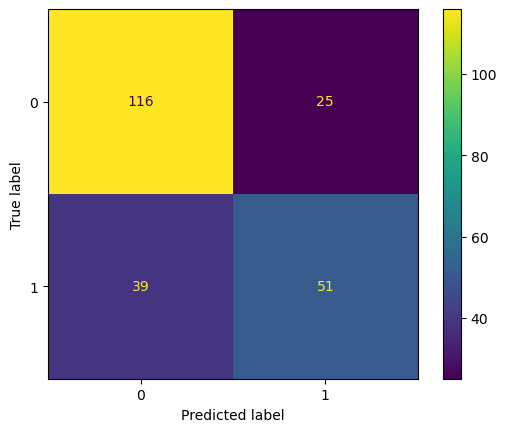

In [18]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [ ]:
# True Negative (Top-Left Corner): The model correctly predicted 116 instances as "not diabetic".
# False Positive (Top-Right Corner): The model incorrectly predicted 22 instances as "diabetic" when they were actually "not diabetic".
# False Negative (Bottom-Left Corner): The model incorrectly predicted 47 instances as "not diabetic" when they were actually "diabetic".
# True Positive (Bottom-Right Corner): The model correctly predicted 46 instances as "diabetic".

# The diagonal from the top-left to the bottom-right shows the number of correct predictions made by the model, while the off-diagonal values represent the types of errors made. The shade of the colors indicates the magnitude of the values in each cell relative to each other(as indicated by colored scale on right side of the matrix),
# True Negative being being the darkest one indicates the highest value.

### To check the accuracy 

In [19]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.8677839851024208
0.7229437229437229


In [ ]:
#here we can see that training accuracy is higher than tetsing accuracy thus we can say that 
#Our MODEL IS OVERFITTED

In [20]:
pred=model.predict([[148,64,23,112,23.5,0.657,60]])
pred

array([1], dtype=int64)

# Naive Bayes  

In [21]:
model2=GaussianNB()

In [22]:
model2.fit(x_train,y_train)

GaussianNB()

In [23]:
y_pred = model2.predict(x_test)

In [24]:
print(model2.score(x_train,y_train))
print(model2.score(x_test,y_test))

0.7728119180633147
0.7489177489177489


In [ ]:
#after applying Niave bayes we can see that model is not much overfitted

In [25]:

f1 = f1_score(y_pred, y_test, average="weighted")
print("F1 Score:", f1)

F1 Score: 0.7573129457706407


In [ ]:
#since our F1 score is closer to 1, suggests that the model's performance is reasonably good,
#as it strikes a balance between precision and recall. So the better model to use here would by Naive Bayes Model.

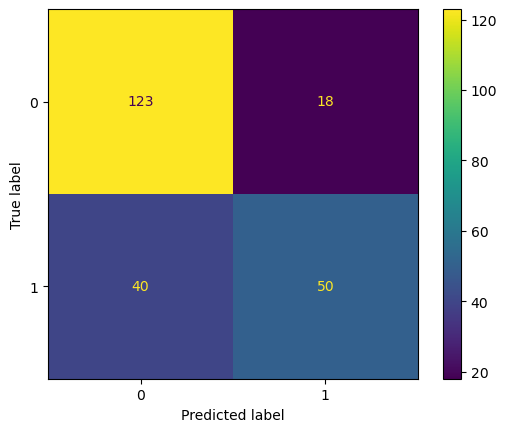

In [26]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [ ]:
# True Negative (Top-Left Corner): The model correctly predicted 120 instances as "not diabetic".
# False Positive (Top-Right Corner): The model incorrectly predicted 18 instances as "diabetic" when they were actually "not diabetic".
# False Negative (Bottom-Left Corner): The model incorrectly predicted 45 instances as "not diabetic" when they were actually "diabetic".
# True Positive (Bottom-Right Corner): The model correctly predicted 48 instances as "diabetic".

# The diagonal from the top-left to the bottom-right shows the number of correct predictions made by the model, while the off-diagonal values represent the types of errors made. The shade of the colors indicates the magnitude of the values in each cell relative to each other(as indicated by colored scale on right side of the matrix),
# True Negative being being the darkest one indicates the highest value.

# Overall, the confusion matrix provides a snapshot of the model's performance, particularly its ability to distinguish between the "diabetic" and "not diabetic" categories. In this case, the model seems to be doing relatively well, with a high count of true positives and true negatives relative to the number of errors (false positives and false negatives).


Key Learnings:

1. Handling Missing Data and Outliers:
   We acquired valuable insights into various techniques for addressing missing variables and outliers in our dataset. Understanding and implementing strategies for handling missing data contribute to data integrity, while effectively managing outliers ensures the robustness of our analyses.

2. Understanding Machine Learning Algorithms:
   A significant part of our learning journey involved delving into the mechanics of machine learning algorithms, particularly Naive Bayes and KNN (K-Nearest Neighbors). We gained a deeper understanding of how these algorithms operate and their respective applications, providing us with a solid foundation in machine learning principles.

3. Practical Application of Data Scaling:
   We translated theoretical knowledge into practical skills by learning how to apply data scaling techniques. This hands-on experience allowed us to standardize or normalize our data, ensuring fair and unbiased comparisons between features with different units or magnitudes.

4. Confusion Matrix Interpretation:
   A pivotal aspect of our learning was the application and interpretation of confusion matrices. We gained proficiency in drawing confusion matrices and understanding their significance. This skill is essential for evaluating the performance of classification models, providing us with a valuable tool for model assessment and refinement.


Additional work that can improve our results:

By enhancing our current analysis and modeling, we can predict diabetes occurrence based on crucial features like age, BMI, and blood pressure. This streamlined predictive approach facilitates efficient decision-making for healthcare providers, utilizing readily available patient information. These refinements can help in creating a more accurate and comprehensive predictive model, empowering healthcare professionals with valuable insights for personalized patient care strategies.

# Spam Classification

In [ ]:
# First Installing the required libraries

In [27]:
!pip install nltk
!pip install imbalanced-learn

#  Import the libraries

In [28]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import nltk #Natural Language Toolkit
from imblearn.over_sampling import SMOTE


#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Importing the Dataset

In [30]:
df=pd.read_csv(r"C:\Users\hp\Desktop\Siiiiuuuu\MLRutwik Sir\spam.csv")
df.head()

,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


Our dataset consists of  5572 cases and 2 columns in which the 1st one denotes the category of the message that its "Spam" or "Not Spam" and the 2nd column is for the message that is classified as "Spam" or "Not Spam"

In [32]:
df.shape

(5572, 2)

In [33]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

# Creating Datarame for "Not Spam"

In [34]:
df1=df[df["Category"]=="not spam"].iloc[0:2000]
df1

,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."
6,not spam,Even my brother is not like to speak with me. ...
...,...,...
2320,not spam,In which place do you want da.
2321,not spam,This pain couldn't have come at a worse time.
2322,not spam,Ok...
2323,not spam,Should I be stalking u?


# Creating Dataframe for "Spam"

In [36]:
df2=df[df['Category']=="spam"].iloc[0:2000]
df2

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [37]:
df=pd.concat([df1,df2])
df

,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."
6,not spam,Even my brother is not like to speak with me. ...
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [38]:
print(" Total number of rows in the dataset are", len(df))

 Total number of rows in the dataset are 2747


# To plot the donut chart and count plot for the categories

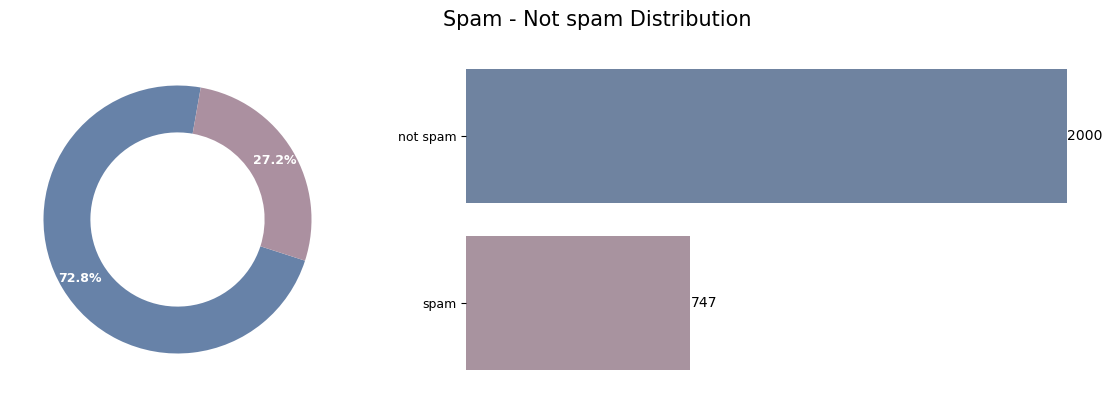

In [39]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax = ax.flatten()
value_counts = df['Category'].value_counts()
labels = value_counts.index.tolist()
colors =["#6782a8", "#ab90a0" ]
# Donut Chart
wedges, texts, autotexts = ax[0].pie(
    value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
    wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
# circle
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
ax[0].add_artist(centre_circle)
# Count Plot
sns.countplot(data=df, y=df['Category'], ax=ax[1], palette=colors, order=labels)
for i, v in enumerate(value_counts):
    ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
sns.despine(left=True, bottom=True)
plt.yticks(fontsize=9,color='black')
ax[1].set_ylabel(None)
plt.xlabel("")
plt.xticks([])
fig.suptitle('Spam - Not spam Distribution', fontsize=15)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [ ]:
# The upper Donut chart represents the percentage of "Spam" and "Not Spam" in the dataset. 72.8% of our data is "Not Spam" and rest 27.2% is "Spam"

# Descriptive Summary of the dataset

In [40]:
df.describe()

,Category,Message
count,2747,2747
unique,2,2566
top,not spam,"Sorry, I'll call later"
freq,2000,13


# Created a column to check length of each text & plot a histogram to check the distirbution.

In [41]:
df['Length']=df['Message'].apply(len)
display(df.head())

#distribution of the data
import plotly.express as px
fig = px.histogram(df, x='Length', marginal='rug',
                   title='Histogram of Text Length')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

,Category,Message,Length
0,not spam,"Go until jurong point, crazy.. Available only ...",111
1,not spam,Ok lar... Joking wif u oni...,29
3,not spam,U dun say so early hor... U c already then say...,49
4,not spam,"Nah I don't think he goes to usf, he lives aro...",61
6,not spam,Even my brother is not like to speak with me. ...,77


In [42]:
fig = px.histogram(df, x='Length', color='Category', marginal='rug',
                   title='Histogram of Text Length by Category')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

In [14]:
get_ipython().system('pip install imblearn')

# from sklearn.feature_extraction.text import CountVectorizer

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer
count = CountVectorizer()

# Transform the text messages
text_transformed = count.fit_transform(df['Message'])

# Train & test split
x_train, x_test, y_train, y_test = train_test_split(text_transformed, df['Category'], test_size=0.30, random_state=100)

# Display the transformed text
print(text_transformed)


  (0, 2662)	1
  (0, 5771)	1
  (0, 3211)	1
  (0, 4304)	1
  (0, 1809)	1
  (0, 1102)	1
  (0, 4049)	1
  (0, 3025)	1
  (0, 1418)	1
  (0, 2719)	1
  (0, 6108)	1
  (0, 3298)	1
  (0, 1416)	1
  (0, 1616)	1
  (0, 5491)	1
  (0, 2693)	1
  (0, 950)	1
  (0, 5948)	1
  (1, 4028)	1
  (1, 3322)	1
  (1, 3189)	1
  (1, 6037)	1
  (1, 4047)	1
  (2, 2143)	1
  (2, 4779)	2
  :	:
  (2746, 4049)	1
  (2746, 3111)	2
  (2746, 4196)	1
  (2746, 5511)	1
  (2746, 5476)	2
  (2746, 2806)	2
  (2746, 5964)	1
  (2746, 6092)	1
  (2746, 437)	1
  (2746, 5548)	1
  (2746, 1459)	1
  (2746, 1751)	1
  (2746, 3699)	1
  (2746, 2163)	1
  (2746, 4510)	1
  (2746, 1408)	1
  (2746, 5655)	1
  (2746, 4399)	1
  (2746, 1619)	1
  (2746, 3862)	1
  (2746, 306)	1
  (2746, 649)	1
  (2746, 4341)	1
  (2746, 165)	1
  (2746, 3970)	1


# Printing the dimentions of the train & test dataset

In [44]:
display('X-Train :', x_train.shape)
display('X-Test :',x_test.shape)
display('Y-Train :',y_train.shape)
display('X-Test :',y_test.shape)


'X-Train :'

(1922, 6224)

'X-Test :'

(825, 6224)

'Y-Train :'

(1922,)

'X-Test :'

(825,)

# Applying SMOTE Technique

In [45]:
smote = SMOTE(random_state=42)

In [46]:
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# NB Model for text classification 

In [47]:
get_ipython().run_cell_magic('time', '', '# Bernoulli Naive Bayes model\nfrom sklearn.naive_bayes import BernoulliNB\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score\n\nbernoulli_nb_model = BernoulliNB()\nbernoulli_nb_model.fit(x_resampled, y_resampled)\n\nprediction = bernoulli_nb_model.predict(x_resampled)')

CPU times: total: 62.5 ms
Wall time: 196 ms


# Train Model

In [48]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_resampled, y_resampled)

y_pred = model.predict(x_test)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_resampled,prediction))

              precision    recall  f1-score   support

    not spam       0.82      0.99      0.90      1400
        spam       0.99      0.78      0.87      1400

    accuracy                           0.89      2800
   macro avg       0.90      0.89      0.88      2800
weighted avg       0.90      0.89      0.88      2800



# To Display the confusion matrix as a heatmap

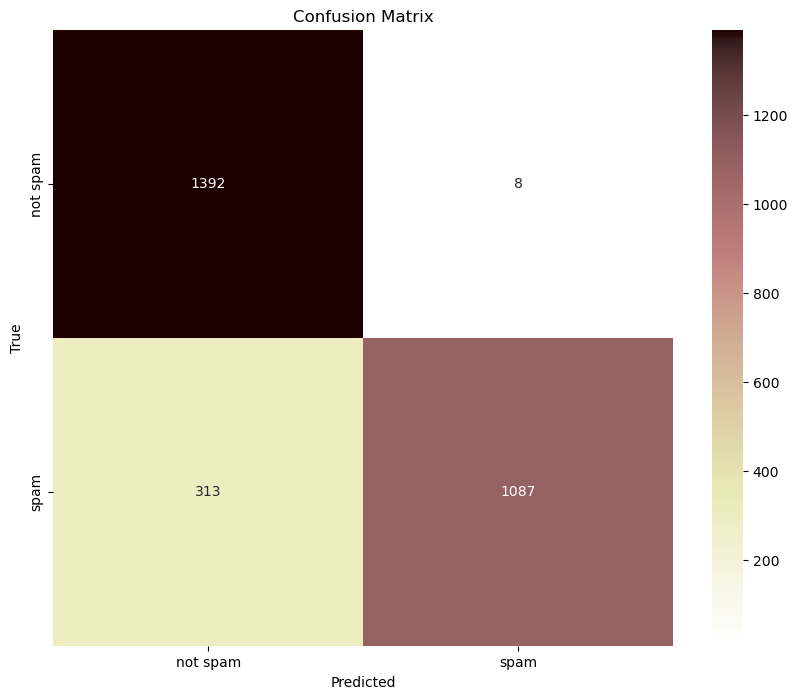

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_resampled, prediction)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink_r', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Interpretation

1. Precision: For the 'not spam' category, the precision is 0.82, meaning that when the model predicts a message is not spam, it is correct 82% of the time. For the 'spam' category, the precision is higher at 0.99, indicating that when the model predicts a message is spam, it is correct 99% of the time.

2. Recall: For the 'not spam' category, the recall is very high at 0.99, which means the model is able to identify 99% of the 'not spam' messages correctly. For the 'spam' category, the recall is 0.78, indicating that the model identifies 78% of the spam messages correctly.

3. F1-score: An F1-score reaches its best value at 1 (perfect precision and recall) and worst at 0. For 'not spam', the F1-score is 0.90, and for 'spam', it is 0.87. Therefore it shows good balance between Precisiona nd Recall.

4. Support: Both 'not spam' and 'spam' categories have a support value of 1400, suggesting an evenly distributed dataset for this binary classification task. The total number of samples is 2800, as indicated by the support for accuracy and both averages.

5. Accuracy: The overall accuracy of the model across all classes is 0.89, indicating that the model correctly identifies spam and not-spam messages 89% of the time.

6. Macro Average: This gives equal weight to each class, averaging the metrics without taking label imbalance into account. The macro-averaged precision, recall, and F1-score are 0.90, 0.89, and 0.88, respectively.

7. Weighted Average: This accounts for label imbalance by weighing the metrics by the support for each class. The weighted-averaged precision, recall, and F1-score are all 0.90, 0.89, and 0.88, respectively, similar to the macro average in this case because support for both classes is the same.

Overall, the model seems to perform quite well, with especially high precision for spam detection but a somewhat lower recall for the same, suggesting some spam messages might be going undetected.

Now for the confusion Matrix:

True Negative (Top-Left Corner): The model correctly predicted 1392 instances as "not spam".
False Positive (Top-Right Corner): The model incorrectly predicted 8 instances as "spam" when they were actually "not spam".
False Negative (Bottom-Left Corner): The model incorrectly predicted 313 instances as "not spam" when they were actually "spam".
True Positive (Bottom-Right Corner): The model correctly predicted 1087 instances as "spam".

The diagonal from the top-left to the bottom-right shows the number of correct predictions made by the model, while the off-diagonal values represent the types of errors made. The shade of the colors indicates the magnitude of the values in each cell relative to each other,True Negative being being the darkest one indicates the highest value.

Overall, the confusion matrix provides a snapshot of the model's performance, particularly its ability to distinguish between the "spam" and "not spam" categories. In this case, the model seems to be doing relatively well, with a high count of true positives and true negatives relative to the number of errors (false positives and false negatives).

Implement Naive Bayes models within real-time messaging systems to dynamically detect and filter spam communications, thereby improving both cybersecurity measures and user experience. By seamlessly integrating contextual analysis methodologies into Naive Bayes models, the discernment between "Not Spam" and "Spam" communications is significantly improved. This enhancement arises from a deeper understanding of the nuanced intricacies within communications, allowing for a more sophisticated and accurate identification of potentially harmful content in real-time, ultimately ensuring a more seamless user interaction.


Key Learnings:

1. Real-Life Dataset Management:
   Gained valuable insights into handling real-life datasets, emphasizing the importance of data cleanliness and integrity. Acquired skills in identifying and addressing data related issues such as duplicates, missing values, and outliers, ensuring the dataset's reliability for subsequent analyses.

2. Application of Spam Classification:
   Explored the practical implementation of spam classification techniques. Understood the significance of distinguishing between "Spam" and "Not Spam" content, particularly in the context of email communications. Developed a nuanced understanding of the challenges and strategies involved in effectively classifying spam.

3. Insights into Email Spam Classification:
   Delved into the mechanics of spam classification within email systems. Acquired knowledge on the underlying principles and algorithms employed to discern spam emails from legitimate ones. Explored the intricate workings of these algorithms, enabling a deeper understanding of email security measures.

4. Handling Imbalanced Datasets:
   Confronted the challenges posed by imbalanced datasets and learned effective techniques to address them.  Acquired practical skills in mitigating imbalances, learned and apllied SMOTE technique to tackle this challenge. 